In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from datetime import datetime, timedelta
import seaborn as sb
import os
os.chdir('/home/saul/python')

###### Convert numerical values to categorical

In [8]:
bike_rental = bike_rental.astype({'season':'string', 'holiday':'category', 'workingday':'category', 
                                  'weather':'category'})

###### Get date and hour_min parts of datetime

In [9]:
bike_rental['date'] = bike_rental['datetime'].str.split(" ").str[0]
bike_rental['hour_mins'] = bike_rental['datetime'].str.split(" ").str[1]


###### Convert date variables format to date  format

In [10]:
bike_rental['date'] = bike_rental['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
bike_rental["day_of_week"] = bike_rental['date'].dt.weekday # get day of week

###### Get hour part

In [11]:
bike_rental['hour'] = bike_rental['hour_mins'].str.split(":").str[0].astype(int)
bike_rental = bike_rental.drop(columns=['hour_mins', 'datetime'])

In [12]:
bike_rental['week_number'] = bike_rental['date'].dt.isocalendar().week.astype("string")
type(bike_rental['week_number'])
bike_rental['year'] = bike_rental['date'].dt.isocalendar().year.astype("string")
bike_rental['week_year'] = bike_rental[['week_number', 'year']].agg('_'.join, axis=1) 

In [13]:

bike_rental['season'] = bike_rental['season'].str.replace('1', 'Spring')

bike_rental['season'] = bike_rental['season'].str.replace('2', 'Summer')
bike_rental['season'] = bike_rental['season'].str.replace('3', 'Fall')
bike_rental['season'] = bike_rental['season'].str.replace('4', 'Winter')

In [14]:
bike_rental['season'].value_counts()

Fall      4496
Summer    4409
Winter    4232
Spring    4218
Name: season, dtype: Int64

In [15]:
bike_rental.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,day_of_week,hour,week_number,year,week_year
0,Spring,0,0,1,0.24,0.2879,0.81,0.0,16.0,2011-01-01,5,0,52,2010,52_2010
1,Spring,0,0,1,0.22,0.2727,0.80,0.0,40.0,2011-01-01,5,1,52,2010,52_2010
2,Spring,0,0,1,0.22,0.2727,0.80,0.0,32.0,2011-01-01,5,2,52,2010,52_2010
3,Spring,0,0,1,0.24,0.2879,0.75,0.0,13.0,2011-01-01,5,3,52,2010,52_2010
4,Spring,0,0,1,0.24,0.2879,0.75,0.0,1.0,2011-01-01,5,4,52,2010,52_2010


In [16]:
bike_rental.describe()

,temp,atemp,humidity,windspeed,count,day_of_week,hour
count,17355.000000,17355.000000,17345.000000,17355.000000,17189.000000,17355.000000,17355.000000
mean,0.497376,0.476124,0.627289,0.190146,190.774914,3.015615,11.546816
std,0.192396,0.171704,0.193061,0.122411,181.805639,2.000213,6.914394
min,0.020000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500,41.000000,1.000000,6.000000
50%,0.500000,0.484800,0.630000,0.194000,144.000000,3.000000,12.000000
75%,0.660000,0.621200,0.780000,0.253700,282.000000,5.000000,18.000000
max,1.000000,1.000000,1.000000,0.850700,977.000000,6.000000,23.000000


In [17]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17355 entries, 0 to 17354
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       17355 non-null  string        
 1   holiday      17355 non-null  category      
 2   workingday   17355 non-null  category      
 3   weather      17355 non-null  category      
 4   temp         17355 non-null  float64       
 5   atemp        17355 non-null  float64       
 6   humidity     17345 non-null  float64       
 7   windspeed    17355 non-null  float64       
 8   count        17189 non-null  float64       
 9   date         17355 non-null  datetime64[ns]
 10  day_of_week  17355 non-null  int64         
 11  hour         17355 non-null  int64         
 12  week_number  17355 non-null  string        
 13  year         17355 non-null  string        
 14  week_year    17355 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(5), int64(

In [18]:
bike_rental['date'].value_counts()

2011-01-01    24
2012-04-01    24
2012-04-27    24
2012-04-28    24
2012-04-29    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: date, Length: 730, dtype: int64

In [19]:
daily_counts = pd.pivot_table(bike_rental, values = 'count', index=['date']).reset_index()

###### Weekly Bike Counts

In [20]:
bike_rental["first_day_of_the_week"] = bike_rental.date - bike_rental.day_of_week * timedelta(days=1) # Get First day of Week

In [21]:
bike_rental.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,day_of_week,hour,week_number,year,week_year,first_day_of_the_week
0,Spring,0,0,1,0.24,0.2879,0.81,0.0,16.0,2011-01-01,5,0,52,2010,52_2010,2010-12-27
1,Spring,0,0,1,0.22,0.2727,0.80,0.0,40.0,2011-01-01,5,1,52,2010,52_2010,2010-12-27
2,Spring,0,0,1,0.22,0.2727,0.80,0.0,32.0,2011-01-01,5,2,52,2010,52_2010,2010-12-27
3,Spring,0,0,1,0.24,0.2879,0.75,0.0,13.0,2011-01-01,5,3,52,2010,52_2010,2010-12-27
4,Spring,0,0,1,0.24,0.2879,0.75,0.0,1.0,2011-01-01,5,4,52,2010,52_2010,2010-12-27


In [22]:
weekly_counts = pd.pivot_table(bike_rental, values = 'count', index=['first_day_of_the_week'], aggfunc= 'sum').reset_index()

In [23]:
weekly_counts.head(-5)

,first_day_of_the_week,count
0,2010-12-27,1786.0
1,2011-01-03,9408.0
2,2011-01-10,9025.0
3,2011-01-17,8770.0
4,2011-01-24,7699.0
...,...,...
95,2012-10-22,49331.0
96,2012-10-29,28762.0
97,2012-11-05,40675.0
98,2012-11-12,37299.0


In [24]:
weekly_counts.to_csv('weekly_bike_counts.csv', index=False)

In [25]:
weekly_counts.describe()

,count
count,105.000000
mean,31230.761905
std,12765.802018
min,0.000000
25%,23132.000000
50%,30779.000000
75%,42323.000000
max,55022.000000


In [26]:
weekly_counts = weekly_counts[weekly_counts['count'] !=0]  # remove zero values (aka 24/12/2012) since this  week
                                                           # is to be predicted and zero value leads incorrect prediction

In [27]:
weekly_counts.describe()

,count
count,104.000000
mean,31531.057692
std,12449.390349
min,1786.000000
25%,23658.500000
50%,30982.000000
75%,42433.250000
max,55022.000000


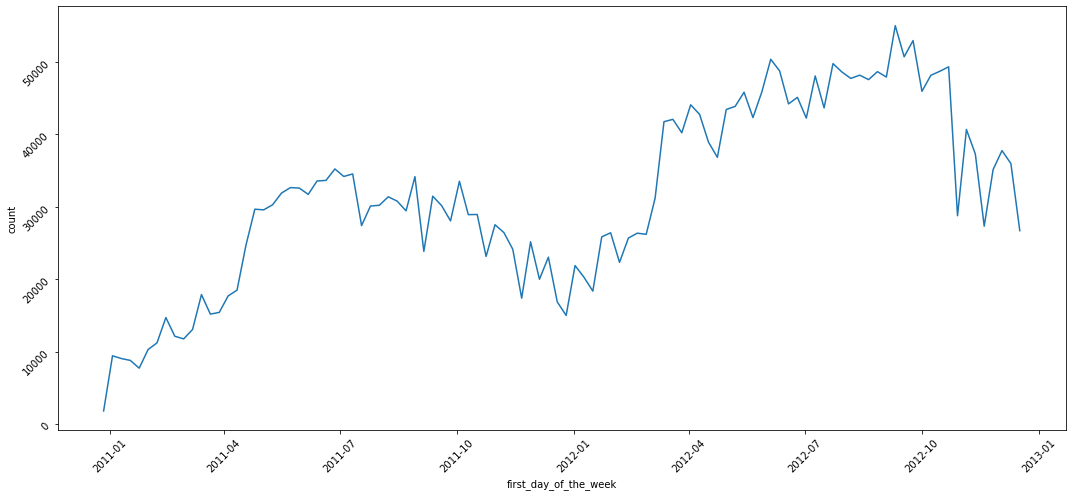

In [28]:
plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True

ax = sb.lineplot(x="first_day_of_the_week", y="count", data=weekly_counts)

ax.tick_params(rotation=45)

plt.show()

###### By looking at the time series graph, there is seasonality during the xmas period (the number of bikes rented during and toward the period is declined) 

###### Trend of bike rentals

<AxesSubplot:ylabel='count'>

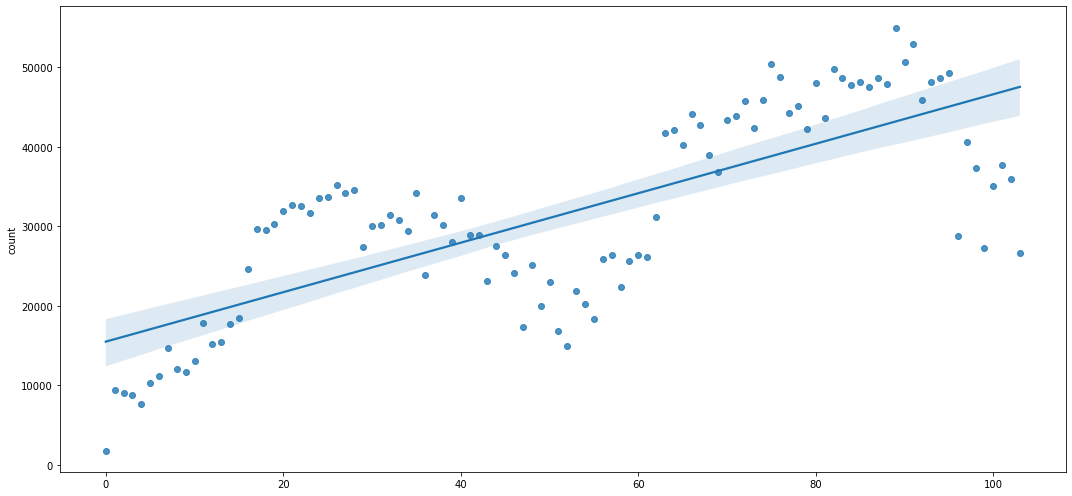

In [29]:
sb.regplot(x=weekly_counts.index, y="count", data=weekly_counts)

#### Predict via Time series auto correlation

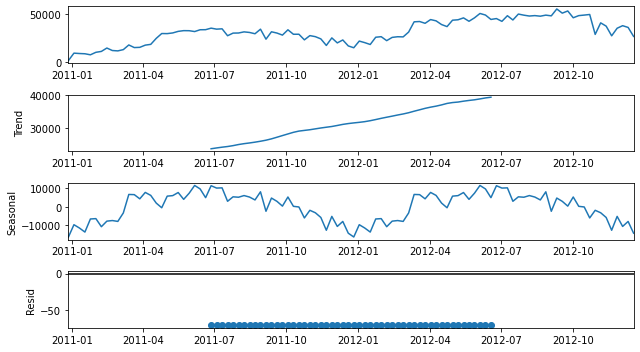

In [44]:
indexed_data_set = weekly_counts.set_index("first_day_of_the_week")

decomp = sm.tsa.seasonal_decompose(indexed_data_set, model='additive') # Additive approach count(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)

figure = decomp.plot()

matplotlib.rcParams['figure.figsize'] = [10,5]

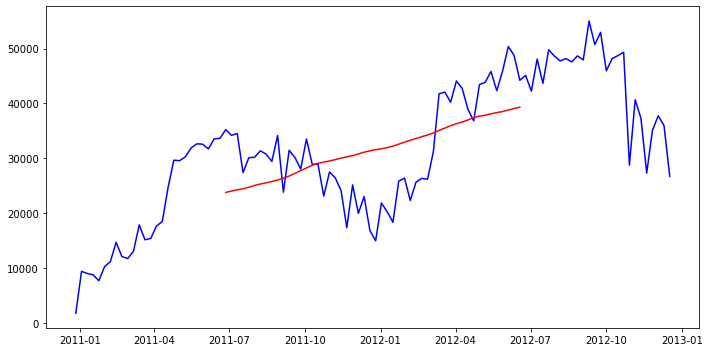

In [45]:
plt.plot(indexed_data_set.index, indexed_data_set['count'], c='blue')
plt.plot(decomp.trend.index, decomp.trend, c='red')

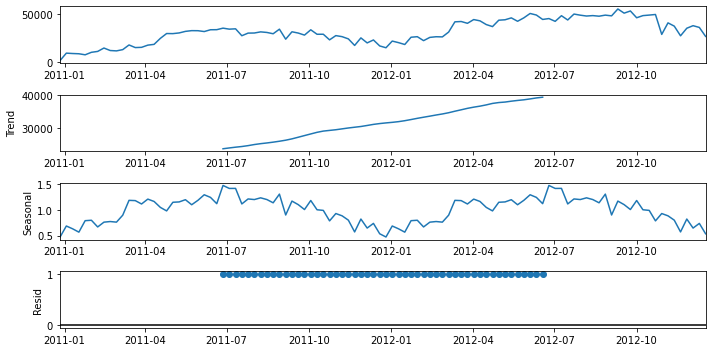

In [48]:
indexed_data_set = weekly_counts.set_index("first_day_of_the_week")

decomp = sm.tsa.seasonal_decompose(indexed_data_set, model='multiplicative') # Multoplicative approach count(t) = Level(t)*Trend(t)*Seasonality(t) + Noise(t)

figure = decomp.plot()

matplotlib.rcParams['figure.figsize'] = [10,5]

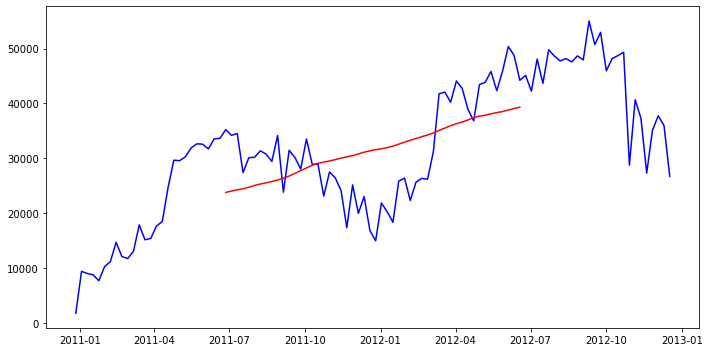

In [49]:
plt.plot(indexed_data_set.index, indexed_data_set['count'], c='blue')
plt.plot(decomp.trend.index, decomp.trend, c='red')

###### Prediction with sklearn RandomForestRegressor

In [50]:
weekly_counts.columns

Index(['first_day_of_the_week', 'count'], dtype='object')

In [51]:
bike_rental.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'date', 'day_of_week', 'hour',
       'week_number', 'year', 'week_year', 'first_day_of_the_week'],
      dtype='object')

In [53]:
#add weekly counts to the original dataset
bike_rental_weekly_count = bike_rental.merge(weekly_counts, on = 'first_day_of_the_week', how='left') #add wekkly counts

In [54]:
len(bike_rental_weekly_count )

17355

In [55]:
len(bike_rental)

17355